_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  

# The best words: Datenanalyse auf Twitter
### Live hack session 27. Juni 2019, Universität Göttingen

<a name="top"></a>Inhalt
---

In [1]:
%%HTML
'<iframe width="622" height="360" src="https://www.youtube.com/embed/0T-Eo0j092Q" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>'

Wir wollen mit Daten (von Twitter) **quantifizieren**, ob Donald Trump wirklich die besten Worte (benutzt) hat. Dabei sollt ihr einen **Einblick in moderne Tools zur Datenanalyse** erhalten und herausfinden, ob euch diese Art des Arbeitens **Spaß** macht. Im Folgenden werden wir uns mit den folgenden Themenblöcken beschäftigen:

* [Das Jupyter-Notebook](#jupyterbasics)
* [Python basics](#pythonbasics)
* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden](#daten_erkunden)
* [Daten Visualisieren](#daten_visualisieren)
* [Hat Trump wirklich die besten Worte?](#all_the_best_words)
---

### Organisatorisches & Regeln:
**Dauer:** etwa 3 Stunden, **Pause** nach etwa 1.5 Stunden, **Getränke** jederzeit frei verfügbar.  

* Fragen jederzeit erlaubt $\rightarrow$ Handzeichen oder dazwischenrufen
* <font color='red'>**rotes**</font> Post-it auf den Bildschirm, wenn ihr Hilfe braucht oder es zu schnell geht
* Helferelein im Raum helfen euch gerne
* Wir machen das hier, damit **ihr** etwas lernt, nicht damit wir uns cool fühlen können - also nicht zögern zu fragen, zu bremsen oder zu diskutieren!
---

<a name="jupyterbasics"></a>Das Jupyter-Notebook
---
* Login [JupyterCloud](jupyter-cloud.gwdg.de)
* Neues Notebook mit Python-Kernell erstellen
* modularer Editor: Text $\leftrightarrow$ Code
* Wichtige Kommandos $\rightarrow$ Cheatsheet
---

<img src="jupyter_cheatsheet.png" width="500"/>

----

Aktionen:
* Neue Zelle machen (```B```)
* etwas in die Zelle schreiben (z. B. ```2 + 2```)
* Zelle ausführen (```SHIFT``` + ```ENTER```)
* Zelle wieder löschen (```D``` ```D```)

[Anfang](#top)

<a name="pythonbasics"></a>Python basics
---
#### Python als Taschenrechner  
$\rightarrow$ Programmiersprache (Scriptsprache), wird interpretiert nicht kompiliert.  
$\rightarrow$ Python als Taschenrechner, Variablen

In [194]:
# Zahlen
2 + 3

5

In [2]:
# Zahlen
7 * 19

133

In [3]:
# Zahlen
2 ** 8

256

In [7]:
# Buchstaben (Strings)
'a' + 'b'

'ab'

In [8]:
# Strings und Zahlen
'a' * 10

'aaaaaaaaaa'

#### Variablen

In [17]:
# Variable | Zuweisung | Wert
meine_variable = 19

In [18]:
meine_variable

19

In [19]:
# alternativ:
print(meine_variable)
print('a')

19
a


In [10]:
# rechnen
a = 10 # was ist der Unterschied zwischen a und 'a'?
b = 15

a + b

25

In [12]:
# Ergebnis in Variable speichern
c = a * b
c

150

In [15]:
# Zahlen und Strings
d = 'c'
e = d * a # was steht jetzt in e?
e

'cccccccccc'

#### Funktionen
Eine Funktion sammelt eine Reihe von Anweisungen und führt sie dann gesammelt aus, wenn wir sie "rufen". ```print()``` ist so eine Funktion. Wir können auch eine eigene bauen:

In [195]:
# Funktion definieren
# WICHTIG: Funktionsname, Klammern, Argumente, Einrückung
def rechnen_mit_zahlen(zahl1, zahl2):
    print('Summe')
    print(zahl1 + zahl2)
    print('Differenz')
    print(zahl1 - zahl2)
    print('Produkt')
    print(zahl1 * zahl2)
            
# was macht die Funktion? Erstmal nix...

In [196]:
# Funktion benutzen
# WICHTIG: tab-completion, Argument
zahl1 = 10
zahl2 = 5
rechnen_mit_zahlen(zahl1, zahl2)

Summe
15
Differenz
5
Produkt
50


#### Bibliotheken

_Cool, aber muss ich jetzt wirklich alles von Hand tippen?_  
$\rightarrow$ ne, das haben schlaue Leute schon vor uns gemacht!  
$\rightarrow$ Bibliotheken

In [197]:
# einfache Bibliothek (Standardblibliothek)
import math

# WICHTIG: Punkt-Operator
math.sqrt(19)

4.358898943540674

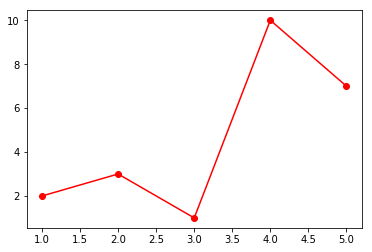

In [198]:
# komplexe Bibliothek (third-party Bibliothek)
# WICHTIG: Kürzel, zwei Argumente (Listen), optionales Argument, keyword Argument
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 1, 10, 7]

plt.plot(x, y, '-o', color = 'red')

#### Fehlermeldungen

_Was passiert, wenn etwas nicht funktioniert?_  
$\rightarrow$ Fehlermeldung **lesen**, **verstehen** (und **googeln**).  
$\rightarrow$ So sieht eine Fehlermeldung aus:

In [50]:
# TypeError
# WICHTIG: Was? Wo? lesen -> (googeln) -> verstehen -> reparieren
a = 10
b = '10'

a + b

TypeError: unsupported operand type(s) for +: 'int' and 'str'

[Anfang](#top)

---

<a name="daten_beschaffen"></a>Daten beschaffen
---

In [29]:
# wo liegen die Daten?
pfad = "daten_live_hack_session/"

# wie heißen die Dateien?
filename_trump = 'tweets_trump.xlsx'
filename_troll = 'tweets_troll_subset.xlsx'
filename_normal = 'tweets_normal_subset.xlsx'

# wie bekommen wir die Daten ins Notebook?
import pandas as pd
tweets_trump = pd.read_excel(pfad + filename_trump)
tweets_troll = pd.read_excel(pfad + filename_troll)
tweets_normal = pd.read_excel(pfad + filename_normal)

In [18]:
tweets_normal.head()

,User,Tweet,tweet_length,word_number,Date
0,robrobbierobert,"@octolinz16 It it counts, idk why I did either...",77,16,2009-04-06 22:20:00
1,abel209,ooooh.... LOL that leslie.... and ok I won't ...,89,20,2009-04-06 22:20:00
2,a_mariepyt,Damm back to school tomorrow,29,6,2009-04-06 22:23:00
3,djwayneski,@msdrama hey missed ya at the meeting sup mama,47,10,2009-04-06 22:26:00
4,gregcronin,missed Brent at praise band. No fun to not ha...,82,15,2009-04-06 22:36:00


#### Exkurs: Liste

In [51]:
# Liste 
# WICHTIG: eckige Klammern, Kommata, Index 0
liste = ['a', 'b', 'c']
liste[0]

'a'

In [154]:
# DataFrame: nix anderes als eine Liste in zwei Dimensionen
# Dimension 1: Spalten
# auf die Spalte mit Namen 'User' zugreifen
tweets_normal['User']

0        robrobbierobert
1                abel209
2             a_mariepyt
3             djwayneski
4             gregcronin
5            marybacchus
6               jkenneth
7                 dreaaa
8                roniker
9                 spcake
10         michellepolus
11             saltypond
12       ACTinglikeamama
13           gravitybomb
14          alice_wonder
15        Materialgirl21
16            marlakalaw
17               verruca
18               SHRIKEE
19              greatAni
20         nataliebaladi
21              Ben_Hall
22              teeeeena
23                Brozzy
24              donalyza
25           SimonFilmer
26       Damn_Knit_Blast
27             Lozzy0910
28             BabyVeezy
29           sanatawileh
              ...       
30281              ADSAJ
30282       jyssica_bOOG
30283        roncharette
30284       JamesConnors
30285            baphled
30286          ypatten35
30287       DirtyBitch16
30288         gamedevftw
30289         IsaacLau86


In [155]:
# Dimension 2: Zeilen
# auf den 10. Eintrag zugreifen
tweets_normal.loc[10]

User                                                michellepolus
Tweet           This earthquake in italy has me sadden.  it's ...
tweet_length                                                  100
word_number                                                    20
Date                                          2009-04-06 23:02:00
Name: 10, dtype: object

[Anfang](#top)

---

<a name="daten_erkunden"></a>Daten erkunden
---
#### Was für Informationen befinden sich in den Datensätzen?

In [16]:
tweets_trump.head()

,User,Tweet,tweet_length,word_number,Date,Year,Month,Hour,hours_since_first_tweet
0,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,117,23,2009-05-04 18:54:00,2009,5,18,0.000000
1,realDonaldTrump,Donald Trump will be appearing on The View tom...,131,22,2009-05-05 01:00:00,2009,5,1,6.100000
2,realDonaldTrump,Donald Trump reads Top Ten Financial Tips on L...,116,17,2009-05-08 13:38:00,2009,5,13,90.733333
3,realDonaldTrump,New Blog Post: Celebrity Apprentice Finale and...,103,13,2009-05-08 20:40:00,2009,5,20,97.766667
4,realDonaldTrump,"""My persona will never be that of a wallflower...",111,21,2009-05-12 14:07:00,2009,5,14,187.216667


In [17]:
tweets_troll.head()

,User,Tweet,tweet_length,word_number,Date
0,10_GOP,Do you agree with the Boy Scouts for allowing ...,60,12,2017-10-12 00:12:00
1,10_GOP,'@realDonaldTrump Our President actually cares...,127,20,2017-09-15 23:03:00
2,10_GOP,Happy 270th birthday to the US Constitution! ð...,70,9,2017-09-17 18:10:00
3,10_GOP,Rocket Man tries to compete with Trump at his ...,85,15,2017-09-22 01:09:00
4,10_GOP,"Milo Yiannopoulos: ""Twitter censorship starts ...",104,15,2017-09-08 00:33:00


#### Wie viele Datenpunkte sind enthalten?

In [19]:
len(tweets_trump)

30311

In [20]:
len(tweets_troll)

30311

In [21]:
len(tweets_normal)

30311

#### Was steht in den Spalten?

In [22]:
tweets_troll.columns

# -> Spaltennamen schon alle gleich
# -> "Date" = String
# -> "User" = String
# -> "Tweet" = String
# -> "tweet_length" = Zahl
# -> "word_number" = Zahl

Index(['User', 'Tweet', 'tweet_length', 'word_number', 'Date'], dtype='object')

In [156]:
# ein zufälliger Tweet
tweets_trump.loc[15672]['Tweet']

'Home of the iconic Ailsa, a four time @The_Open course, @TrumpTurnberry is a landmark on the Ayrshire coastline http://t.co/qMVZJzHtLq'

#### Worin unterscheiden sich die drei Tabellen?

In [24]:
# -> Anzahl enthaltene User, Typ der User
tweets_trump['User'].unique()

array(['realDonaldTrump', 'DonaldJTrumpJr', 'TeamTrump', 'EricTrump'],
      dtype=object)

#### Woher kommen die Daten?
* ["normale" Twitter-User](http://help.sentiment140.com/for-students/) Diese Daten wurden eigentlich für eine sog. "sentiment Analyse", also eine Analyse der Gefühlslage des Twitter-Nutzers gesammelt. Die Methode, die der Datensammlung zu Grunde liegt, wird in [dieser Publikation](https://cs.stanford.edu/people/alecmgo/papers/TwitterDistantSupervision09.pdf) beschrieben. 
* [Donald Trump](https://github.com/mkearney/trumptweets) zur Datenquelle der Trump-Tweets gibt es keine genauere Dokumentation. Das sollte uns das hellhörig werden lassen und darauf hinweisen, dass die Datenquelle nicht unbedingt vertrauenswürdig ist. Eine Alternative wäre, die entsprechenden Tweets selbst zu sammeln.
* [russische Trolle](https://github.com/fivethirtyeight/russian-troll-tweets/) Eine sehr gute Beschreibung des Datensatzes sowie der Methoden die angewandt wurden, um die Trolle zu identifizieren gibt es auf dem [GitHub Profil](https://github.com/fivethirtyeight/russian-troll-tweets/) des Projektes. Zum besseren Verständnis der Bedeutung des Datensatzes bietet sich auch [dieser](https://fivethirtyeight.com/features/why-were-sharing-3-million-russian-troll-tweets/) Artikel an.

Die Daten wurden für dieses Event aufbereitet. Die komplette Aufbereitungs-Pipeline ist im Notebook ```live_hack_session_data_preparation.ipynb``` hinterlegt.

#### Ein bisschen deskriptive Statistik

In [25]:
# describe() für tweet_length und word_number
tweets_trump['tweet_length'].describe()

count    30311.000000
mean       107.254924
std         33.469318
min          9.000000
25%         87.000000
50%        119.000000
75%        136.000000
max        140.000000
Name: tweet_length, dtype: float64

In [26]:
tweets_troll['tweet_length'].describe()

count    30311.000000
mean        99.200587
std         31.374940
min          7.000000
25%         75.000000
50%        106.000000
75%        126.000000
max        140.000000
Name: tweet_length, dtype: float64

In [27]:
tweets_normal['tweet_length'].describe()

count    30311.000000
mean        73.366732
std         35.763741
min          8.000000
25%         44.000000
50%         69.000000
75%        102.500000
max        140.000000
Name: tweet_length, dtype: float64

[Anfang](#top)

---

<a name="daten_visualisieren"></a>Daten visualisieren
---
Visualisierung funktioniert am besten mit Zahlen, deswegen konzentrieren wir uns im Folgenden auf die Spalten
* ```tweet_length``` (Zeichen in einem Tweet) und
* ```word_number``` (Worte in einem Tweet)

In [158]:
# diese Bibliothek brauchen wir zum Visualisieren
import matplotlib.pyplot as plt

### Histogramme
Mit Histogrammen können wir die Verteilung einer Größe darstellen:

Text(0,0.5,'Anzahl Tweets')

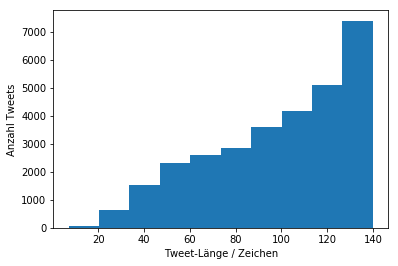

In [33]:
# der Funktion hist() übergeben wir eine Liste an Werten
plt.hist(tweets_troll['tweet_length'])

# was fehlt für einen guten Plot? -> Achsenbeschriftungen
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')

# Fragen / Aktionen
# was sehen wir hier?
# wieviele Zeichen kann ein Tweet haben?
# passe "bins" an
# selbe Visualisierung für normale User und Trolle

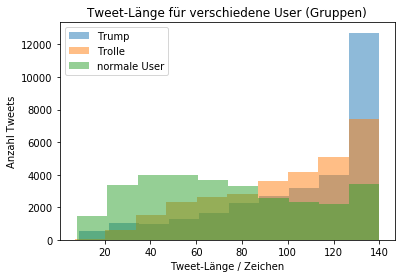

In [35]:
# Visualisierung für alle drei auf einmal
plt.hist(tweets_trump['tweet_length'], alpha=0.5, label='Trump')
plt.hist(tweets_troll['tweet_length'], alpha=0.5, label='Trolle')
plt.hist(tweets_normal['tweet_length'], alpha=0.5, label='normale User')

# Achsenbeschriftungen
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Anzahl Tweets')

# was fehlt für einen guten Plot? -> Legende, Titel
plt.legend()
plt.title('Tweet-Länge für verschiedene User (Gruppen)')

# Plot sieht schon mal ziemlich schick aus. Speichern?
pfad_output = 'plots_live_hack_session/'
plt.savefig(pfad_output + 'tweet_laengen.pdf')

[Anfang](#top)

### Scatterplots
Was, wenn wir uns die Beziehung von zwei Beobachtungen, z.B. Tweetlänge und Wortanzahl zueinander ansehen wollen?

Text(0,0.5,'Wortanzahl')

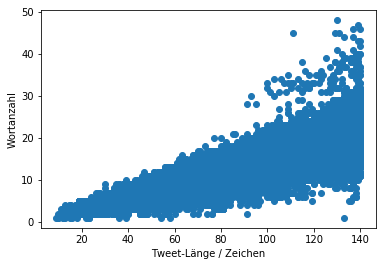

In [159]:
# der Funktion scatter() geben wir zwei Listen mit Werten, die erste wird
# als x-Koordinate interpretiert, die zweite als y-Koordinate
plt.scatter(tweets_trump['tweet_length'], tweets_trump['word_number'])

# Achsenbeschriftungen
plt.xlabel('Tweet-Länge / Zeichen')
plt.ylabel('Wortanzahl')

Die Wortanzahl scheint stark mit der Tweet-Länge zu korrelieren (irgendwie intuitiv...)

In [160]:
# hat Trump die besten Worte?
# Erste Vermutung: wenn Trump die _meisten_ Worte hat, dann hat er auch eine
# höhere Chance, die _besten_ Worte zu haben.

# Schauen wir uns noch mal das Histogramm mit den Tweetlängen für alle
# drei Datensätze an:
# -> Trump und die Trolle scheinen sich ein enges Match um die längsten 
# Tweets zu liefern
# -> Worte zählen:

print('Anzahl der von Trump getweeteten Worte:')
print(tweets_trump['word_number'].sum())
print()

print('Anzahl der von den Trollen getweeteten Worte:')
print(tweets_troll['word_number'].sum())
print()

print('Anzahl der von den normalen Usern getweeteten Worte:')
print(tweets_normal['word_number'].sum())

Anzahl der von Trump getweeteten Worte:
498605

Anzahl der von den Trollen getweeteten Worte:
394572

Anzahl der von den normalen Usern getweeteten Worte:
431782


**Trump hat eindeutig die meisten Worte benutzt**  
Sidenote: die normalen User sind auch nicht so schlecht! Sah im Histogramm aber nicht so aus...

[Anfang](#top)

#### Was ist sonst noch so in den Daten? $\rightarrow$ Datum & Zeit!

In [161]:
tweets_trump.head(1)

,User,Tweet,tweet_length,word_number,Date,Year,Month,Hour,hours_since_first_tweet
0,realDonaldTrump,Be sure to tune in and watch Donald Trump on L...,117,23,2009-05-04 18:54:00,2009,5,18,0.0


Text(0,0.5,'Anzahl')

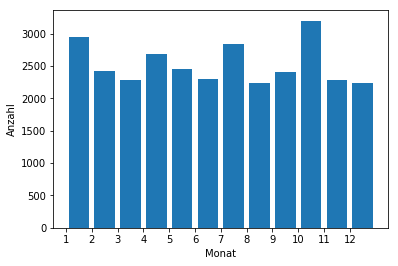

In [162]:
# Unterschied in der Tweet-Frequenz zwischen den Monaten?
plt.hist(tweets_trump['Month'], bins=range(1,14), rwidth=0.8)
plt.xticks(range(1,13))
plt.xlabel('Monat')
plt.ylabel('Anzahl')

# -> nicht wirklich

Text(0,0.5,'Anzahl')

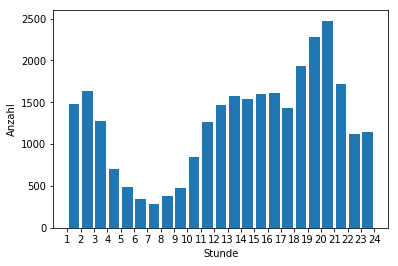

In [163]:
# Unterschiede in den Stunden?
plt.hist(tweets_trump['Hour'], bins=range(1,25), rwidth=0.8)
plt.xticks(range(1,25))
plt.xlabel('Stunde')
plt.ylabel('Anzahl')

# -> Trump schläft offensichtlich zwischen 4 Uhr und 10 Uhr morgens

In [72]:
# wieviele Jahre umfasst der Datensatz? 
# -> benutze Funktion unique()
tweets_trump['Year'].unique()

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

Text(0,0.5,'Anzahl')

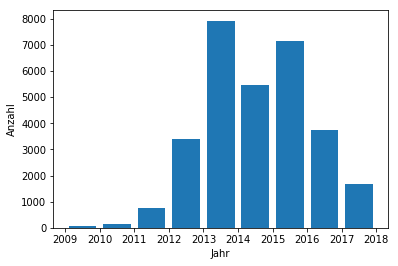

In [164]:
# Unterschiede in der Tweet-Frequenz zwischen den Jahren?
jahre = range(2009, 2019)
plt.hist(tweets_trump['Year'], bins=jahre, rwidth=0.8)
plt.xticks(jahre)
plt.xlabel('Jahr')
plt.ylabel('Anzahl')

# -> definitiv!

In [77]:
# wieviele Tweets pro Tag?
N_tweets = len(tweets_trump)
N_jahre = len(tweets_trump['Year'].unique())

print('Tweets pro Tag:')
N_tweets / (N_jahre * 365)

Tweets pro Tag:


8.304383561643835

[Anfang](#top)

---

<a name="all_the_best_words"></a>Hat Trump wirklich die besten Worte?
---

Womit könnten wir messen, was die **besten** Worte sind?
* Länge
* Unterschiedlichkeit

Wie erkennen wir, wo ein Wort endet und wo ein neues beginnt?  
$\rightarrow$ Leerzeichen  
$\rightarrow$ _iteriere_ über alle Tweets, "zerteile" den Tweet an den Leerzeichen und sammle die Worte ein.

In [180]:
satz = 'ich hätte jetzt gern ein Bier'
satz.split(' ')

['ich', 'hätte', 'jetzt', 'gern', 'ein', 'Bier']

#### Exkurs: Schleifen und Listen
Der Datensatz enthält über 30.000 Tweets. Jeden Tweet "per Hand" zu analysieren ist nicht menschenmöglich. Wir brauchen einen Weg, die selbe Aktion für jedes Element in einer Liste auszuführen.

In [168]:
# Aufgabe: die Zahlen von 1 bis 5 quadrieren und ausgeben
# Lösung mit for-Schleife. WICHTIG: Einrückungen, Laufvariable
liste = [1,2,3,4,5]
for zahl in liste:
    print(zahl * zahl)

1
4
9
16
25


Außerdem brauchen wir noch eine Möglichkeit, die Worte zu "sammeln". Das tun wir mit einer neuen Liste:

In [178]:
# das ist eine Liste
liste = [1,2,3]

In [179]:
# das ist eine zweite Liste
neue_liste = [4,6,6]

# wir hängen die zweite Liste an die erste an
liste.extend(neue_liste)
print(liste)

[1, 2, 3, 4, 6, 6]


#### Erstelle eine Liste aller Worte, um sie zu analysieren

In [78]:
# Liste, um alle vorkommenden Worte zu speichern
words_trump = []

liste = tweets_trump['Tweet']
# iteriere über alle Tweets
for tweet in liste:
    # zerteile den Tweet entlang der Leerzeichen in Worte
    words = tweet.split(' ')
    # hänge die Liste mit Worten an die globale Liste an
    words_trump.extend(words)

In [79]:
# selbe Vorgehensweise für Trolle und normale User
words_troll = []
for tweet in tweets_troll['Tweet']:
    words = tweet.split(' ')
    words_troll.extend(words)
    
words_normal = []
for tweet in tweets_normal['Tweet']:
    words = tweet.split(' ')
    words_normal.extend(words)

In [166]:
words_trump[50:60]

['Financial',
 'Tips',
 'on',
 'Late',
 'Show',
 'with',
 'David',
 'Letterman:',
 'http://tinyurl.com/ooafwn',
 '-']

[Anfang](#top)

#### Worte filtern

**ACHTUNG!** Tweets enthalten nicht nur "richtige" Worte sondern auch Links, Hashtags, Kunstworte, ...  
$\rightarrow$ Wir wollen nur echte Englische Worte zählen und vergleichen.  

Wie finden wir heraus, ob ein Wort ein echtes Wort ist?  
$\rightarrow$ Wörterbuch!  

Und in Python?  
$\rightarrow$ Hat dankenswerterweise auch schon jemand eine Bibliothek mit einem Wörterbuch gemacht.  
$\rightarrow$ Die Bibliothek ist noch nicht auf dem Cluster installiert, deswegen müssen wir sie fix nachladen:

In [83]:
# die Bibliothek "sys" gibt uns Zugriff auf die Funktionen
# des Betriebssystems. Damit können wir ein neues Modul 
# importieren
import sys
!{sys.executable} -m pip install pyenchant

import enchant

In [181]:
# erstelle ein Wörterbuch mit (amerikanischem) Englisch
woerterbuch = enchant.Dict("en_US")

# überprüfe, ob das Wort "hello" im Wörterbuch zu finden ist
wort = "Hello"
woerterbuch.check(wort)

True

In [182]:
# Gegencheck: ein Wort, das nicht existiert
wort = "Helo"
woerterbuch.check(wort)

False

In [87]:
correct_words_trump = []
for word in words_trump:
    if woerterbuch.check(word):
        correct_words_trump.append(word)

ValueError: can't check spelling of empty string

Was ist hier passiert?  
$\rightarrow$ ```split()``` erzeugt auch 'leere' Strings:

In [93]:
test = '   '
test_list = test.split(' ')
print(len(test_list))
print(len(test_list[0]))

4
0


Wie filtern wir die leeren strings heraus?

[Anfang](#top)

#### Exkurs: Logik
"Mache etwas, wenn..."

In [25]:
# Aufgabe: wenn Zahl kleiner 4 ist, quadriern
zahl = 3
if zahl < 4:
    print(zahl * zahl)

27


In [27]:
# Aufgabe: wenn Zahl kleiner 4 ist: quadrieren, sonst zahl + zahl ausgeben
zahl = 2
if zahl < 4:
    print(zahl * zahl)
else:
    print(zahl + zahl)

4


In [29]:
# Aufgabe wie oben nur für alle Zahlen von 1-10 
for zahl in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    if zahl < 4:
        print(zahl * zahl)
    else:
        print(zahl + zahl)

1
4
9
8
10
12
14
16
18
20


Mit diesem Wissen können wir die Wortliste nach Englischen Wörtern durchsuchen.  
Wir wollen jetzt zwei Fliegen mit einer Klappe schlagen, und auch gleich die Länge jedes Wortes messen und speichern:

In [183]:
# leere Liste für die richtigen Worte
correct_words_trump = []
# leere Liste für die Wortlängen
word_length_trump = []

# wir iterieren über die "rohe" Wortliste
for word in words_trump:
    # wir haben gesehen, dass leere strings eine Länge von 0 haben
    # das können wir überprüfen und nur strings im Wörterbuch testen,
    # deren Länge größer als 0 ist
    if len(word) > 0 and woerterbuch.check(word):
        # füge das neue korrekte Wort der Liste hinzu
        correct_words_trump.append(word)
        # miss die Länge des Wortes
        length = len(word)
        # füge die Länge der Liste hinzu
        word_length_trump.append(length)

In [101]:
# Trolle
correct_words_troll = []
word_length_troll = []
for word in words_troll:
    if len(word) > 0 and woerterbuch.check(word):
        correct_words_troll.append(word)
        length = len(word)
        word_length_troll.append(length)

In [102]:
# normale User:
correct_words_normal = []
word_length_normal = []
for word in words_normal:
    if len(word) > 0 and woerterbuch.check(word):
        correct_words_normal.append(word)
        length = len(word)
        word_length_normal.append(length)

In [184]:
# wieviele Worte haben wir "verloren"?
print(len(words_trump))
print(len(correct_words_trump))

498605
379165


[Anfang](#top)

#### Ein eigenes DataFrame...
Wir haben gesehen, dass die Bibliothek ```pandas``` uns praktische Möglichkeiten zur Verfügung stellt, Daten zu speichern. Das _Objekt_, in dem unsere Daten zu Trump, den Trollen und den normalen Usern die ganze Zeit gespeichert waren ist ein sog. ```DataFrame```. Das können wir uns auch selber für die Wort-Daten basteln, um einfacher mit ihnen umgehen zu können:

In [185]:
# erstelle ein leeres neues DataFrame
trump_word_data = pd.DataFrame()
# erzeuge eine neue Spalte mit namen "word" und als Inhalt die Wortliste
trump_word_data['word'] = correct_words_trump
# erzeuge eine neue Spalte mit namen "length" und als Inhalt die Längen-Liste
trump_word_data['length'] = word_length_trump
trump_word_data.head(2)

,word,length
0,Be,2
1,sure,4


In [186]:
# für Trolle
troll_word_data = pd.DataFrame()
troll_word_data['word'] = correct_words_troll
troll_word_data['length'] = word_length_troll
troll_word_data.head(2)

,word,length
0,Do,2
1,you,3


In [187]:
# für normale User
normal_word_data = pd.DataFrame()
normal_word_data['word'] = correct_words_normal
normal_word_data['length'] = word_length_normal
normal_word_data.head(2)

,word,length
0,It,2
1,it,2


[Anfang](#top)

Zurück zu unseren Fragen: 
* Wer hat die längsten Worte? $\rightarrow$ berechne die mittlere Wortlänge

In [124]:
# berechne den Mittelwert der Spalte "length"
mean_trump = trump_word_data['length'].mean()
mean_troll = troll_word_data['length'].mean()
mean_normal = normal_word_data['length'].mean()

print('mittlere Wortlänge Trump')
print(mean_trump)
print()

print('mittlere Wortlänge Trolle')
print(mean_troll)
print()

print('mittlere Wortlänge normale User')
print(mean_normal)

mittlere Wortlänge Trump
4.404275183627181

mittlere Wortlänge Trolle
4.674076604927172

mittlere Wortlänge normale User
3.9611694694364625


Text(0,0.5,'mittlere Wortlänge')

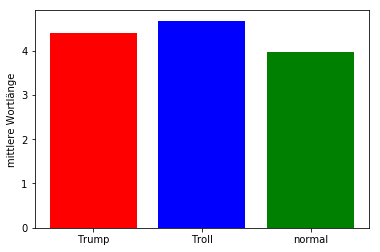

In [150]:
plt.bar(['Trump', 'Troll', 'normal'], [mean_trump, mean_troll, mean_normal], color = ['red', 'blue', 'green'])
plt.ylabel('mittlere Wortlänge')

* Wer benutzt die unterschiedlichsten Worte? $\rightarrow$ zähle die einzigartigen Worte

In [188]:
# zähle alle einzigartigen Einträge der Spalte "word"
unique_trump = len(trump_word_data['word'].unique())
unique_troll = len(troll_word_data['word'].unique())
unique_normal = len(normal_word_data['word'].unique())

print('Einzigartige Worte von Trump:')
print(unique_trump)
print()

print('Einzigartige Worte von Trollen:')
print(unique_troll)
print()

print('Einzigartige Worte von normalen Usern:')
print(unique_normal)

Einzigartige Worte von Trump:
24142

Einzigartige Worte von Trollen:
29175

Einzigartige Worte von normalen Usern:
23405


Text(0,0.5,'einzigartige Worte')

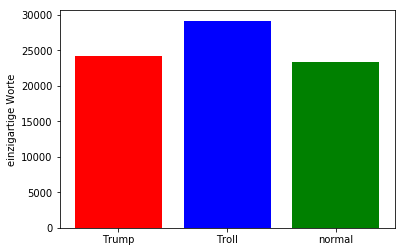

In [189]:
plt.bar(['Trump', 'Troll', 'normal'], [unique_trump, unique_troll, unique_normal], color = ['red', 'blue', 'green'])
plt.ylabel('einzigartige Worte')

**Die Trolle gewinnen auf ganzer Linie!**

### Bonus: ...and the best of them ist stupid!

In [190]:
word = 'stupid' 
# Aktionen:
# auch 'best' und 'word' versuchen und sehen, 
# dass Trump auch diese beiden Worte am meisten
# benutzt

In [191]:
trump_word_data['word'].str.count(word).sum()

105

In [192]:
troll_word_data['word'].str.count(word).sum()

45

In [193]:
normal_word_data['word'].str.count(word).sum()

95

**Trump liegt knapp vorne, was die Benutzung des Wortes "stupid" angeht.**

[Anfang](#top)

### Und wie gehts jetzt weiter?
$\rightarrow$ [CorrelAid](https://correlaid.org/correlaid-x/goettingen/) Projekt  
$\rightarrow$ Python-Vorlesungen im WiSe  
$\rightarrow$ Vorlesung "Daten Lesen Lernen" im SoSe 2020